## Review steps

1. Data collection
2. Data preprocessing
3. train-test split
4. Choosing ml/dl model
5. Train model
6. Do prediction and evaluate the model

In [1]:
import numpy as np # linear algebra import pandas
from numpy import array
import pandas as pd
import math 
import seaborn as sns 
import datetime as dt 
from datetime import datetime
sns.set_style("whitegrid") 
from pandas.plotting import autocorrelation_plot 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot" )
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm
from sklearn.svm import SVR

## Loading data

In [2]:
data= pd.read_csv("Yamaha.csv",delimiter=";")
data

,Date,Price,Open,High,Low,Volume,Change
0,04/01/2018,"4320,00","4210,00","4320,00","4205,00","1160000,0","0,03850"
1,05/01/2018,"4380,00","4340,00","4385,00","4315,00","942600,0","0,01390"
2,09/01/2018,"4465,00","4415,00","4470,00","4375,00","968700,0","0,01940"
3,10/01/2018,"4520,00","4470,00","4530,00","4465,00","764000,0","0,01230"
4,11/01/2018,"4540,00","4525,00","4545,00","4515,00","796800,0","0,00440"
...,...,...,...,...,...,...,...
1447,08/12/2023,"3216,00","3271,00","3271,00","3199,00","1440000,0","-0,01680"
1448,11/12/2023,"3216,00","3259,00","3269,00","3213,00","944400,0","0,00000"
1449,12/12/2023,"3176,00","3269,00","3271,00","3174,00","991400,0","-0,01240"
1450,13/12/2023,"3218,00","3190,00","3230,00","3190,00","1040000,0","0,01320"


## Data Exploration

In [3]:
# Check the data type of each value column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1452 non-null   object
 1   Price   1452 non-null   object
 2   Open    1452 non-null   object
 3   High    1452 non-null   object
 4   Low     1452 non-null   object
 5   Volume  1452 non-null   object
 6   Change  1452 non-null   object
dtypes: object(7)
memory usage: 79.5+ KB


In [4]:
# Reformat the date data type
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')  # Ví dụ cho định dạng dd/mm/yyyy
data['Date']

0      2018-01-04
1      2018-01-05
2      2018-01-09
3      2018-01-10
4      2018-01-11
          ...    
1447   2023-12-08
1448   2023-12-11
1449   2023-12-12
1450   2023-12-13
1451   2023-12-14
Name: Date, Length: 1452, dtype: datetime64[ns]

In [5]:
# Clean data and cast data for calculation
data['Price'] = data['Price'].str.replace(',', '.').astype(float)
data['Open'] = data['Open'].str.replace(',', '.').astype(float)
data['High'] = data['High'].str.replace(',', '.').astype(float)
data['Low'] = data['Low'].str.replace(',', '.').astype(float)
data['Volume'] = data['Volume'].str.replace(',', '.').astype(float)
data['Change'] = data['Change'].str.replace(',', '.').astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1452 non-null   datetime64[ns]
 1   Price   1452 non-null   float64       
 2   Open    1452 non-null   float64       
 3   High    1452 non-null   float64       
 4   Low     1452 non-null   float64       
 5   Volume  1452 non-null   float64       
 6   Change  1452 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 79.5 KB


In [6]:
# Gets descriptive statistical information about a DataFrame or a Series
data.describe()

,Date,Price,Open,High,Low,Volume,Change
count,1452,1452.000000,1452.000000,1452.000000,1452.000000,1.452000e+03,1452.000000
mean,2020-12-26 16:00:59.504132352,5342.451102,5344.658402,5400.580579,5283.276171,6.088632e+05,0.000012
min,2018-01-04 00:00:00,3142.000000,3190.000000,3205.000000,3133.000000,1.144000e+05,-0.145700
25%,2019-07-01 18:00:00,4938.750000,4940.000000,4990.000000,4890.000000,4.071750e+05,-0.011325
50%,2020-12-28 12:00:00,5315.000000,5320.000000,5370.000000,5260.000000,5.324000e+05,0.000000
75%,2022-06-24 18:00:00,5770.000000,5790.000000,5840.000000,5720.000000,7.116750e+05,0.010700
max,2023-12-14 00:00:00,7440.000000,7450.000000,7490.000000,7360.000000,3.140000e+06,0.126700
std,NaN,695.721143,694.041663,698.877570,688.962765,3.185040e+05,0.020299


## Data Visualization

In [7]:
# Reshape turns df into a NumPy array of size (-1, 1)
df=data['Price'].values
df = df.reshape(-1, 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Perform data normalization according to the min-max scaling method
price_scaled=scaler.fit_transform(df) # Fit và transform the data
price_scaled

array([[0.27408097],
       [0.28804095],
       [0.30781759],
       ...,
       [0.00791066],
       [0.01768264],
       [0.        ]])

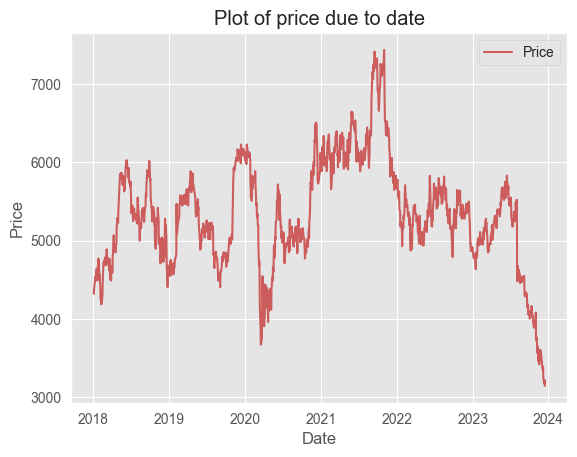

In [9]:
# Create plot
plt.figure(figure=(10,6))
plt.plot(data['Date'],data['Price'].values, label="Price", color="IndianRed")

# Adding title
plt.title("Plot of price due to date")

# Adding label
plt.xlabel("Date")
plt.ylabel("Price")

# Show the plot
plt.legend()
plt.show()

## Data Preprocessing

### Split data into training and testing set

### Training - testing 6:4

In [10]:
# Split train test validation in ratio 6:4
# Split the data into training, testing
train_size = int(0.6 * len(data))
test_size = int(0.4 * len(data))

X2D = data[['High']] # Independent variable in 2-dimensional array
Y2D = data[['Price']] # Dependent variable in 2-dimensional array

In [11]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index # Get the index before converting it to a 2-dimensional array (serves plot)
y_train = Y2D[:train_size].values.ravel()

# Create SVR model with RBF kernel
model = SVR(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],             
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  
    'epsilon': [0.001, 0.01, 0.1, 1, 10]     
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model using grid search
svr_rbf = grid_search.fit(x_train,y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best parameters: {'C': 1000, 'epsilon': 10, 'gamma': 'scale'}
Best score: 16623.859454163023


In [12]:
y_pred = svr_rbf.predict(x_test)
y_pred

array([6160.00061723, 6338.41159134, 6306.25876291, 6380.94180537,
       6401.83388674, 6412.13593283, 6401.83388674, 6231.9228475 ,
       6263.56288004, 6120.18219623, 6042.74533121, 5957.13831672,
       6090.85623481, 6401.83388674, 6391.43071709, 6380.94180537,
       6306.25876291, 6432.37189695, 6461.54748515, 6573.01515731,
       6491.28650928, 6480.19104608, 5985.38098355, 5888.06645159,
       6161.27468147, 6199.16080217, 5849.99075597, 5946.18607086,
       5776.06539558, 5705.88838922, 5579.59235238, 5511.42170134,
       5794.22942842, 5849.99075597, 5689.02296409, 5776.06539558,
       5723.03633231, 5907.32389889, 5926.70346061, 6199.16080217,
       6289.74464208, 6537.80887237, 6480.19104608, 6585.47512982,
       6529.72891791, 6356.41853529, 6372.09624059, 6306.96426147,
       6161.27468147, 5888.06645159, 5868.94950868, 5794.22942842,
       5758.13664582, 5868.94950868, 6103.27313379, 6083.72198066,
       5776.06539558, 5849.99075597, 5907.32389889, 5946.18607

In [13]:
last_row = data.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[3142.]])

In [14]:
x_next_30_days = []
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)
x_next_30_days

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with f

[array([4758.44223363]),
 array([4718.77608929]),
 array([4681.25612267]),
 array([4645.89329706]),
 array([4612.5543322]),
 array([4580.97946482]),
 array([4550.80721139]),
 array([4521.59438379]),
 array([4492.82315434]),
 array([4463.88988733]),
 array([4434.07063915]),
 array([4402.45475696]),
 array([4367.82988087]),
 array([4328.48690278]),
 array([4281.89055321]),
 array([4224.14348931]),
 array([4149.27211798]),
 array([4049.2362646]),
 array([3920.10035924]),
 array([3791.33246693]),
 array([3747.7264296]),
 array([3758.11344962]),
 array([3754.40857489]),
 array([3755.64133179]),
 array([3755.220231]),
 array([3755.36285161]),
 array([3755.31440585]),
 array([3755.3308457]),
 array([3755.32526503]),
 array([3755.32715923])]

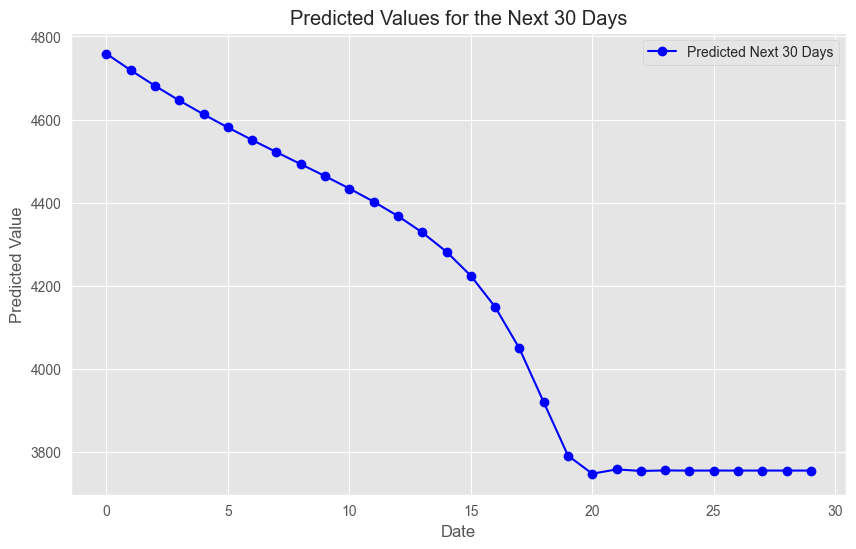

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.legend()

plt.show()

In [16]:
y_pred = y_pred.reshape(-1,1)

In [ ]:
# Create index for the next 30 days
last_index =  data.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

In [17]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', str(test_mape*100)+'%')
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)
# Huber loss
hl= mean_squared_error(y_test, y_pred, multioutput='raw_values')
print('Huber loss:', hl)

Testing RMSE: 372.7406438134404
Testing MAPE: 2.674499100614891%
Testing MAE: 143.57999700193199
Huber loss: [138935.58755046]


In [ ]:
plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates,x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()